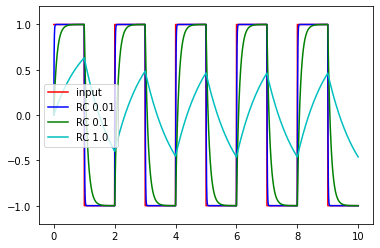

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def inPulseShape(t):
   p=-1.0
   if int(t)%2 == 0:
      p=1.0

   return  p

def yprime(yout,t,RCvalue):
   yp=(inPulseShape(t)-yout)/RCvalue
   return yp

def Euler(y0,t,RCvalue):
   n=len(t)
   yval=np.zeros(n)
   yval[0]=y0

   i=0
   while i < (n-1):
      tx=t[i]
      dt=t[i+1]-t[i]
      yval[i+1]=yval[i]+yprime(yval[i],tx,RCvalue)*dt
      i=i+1
   return yval

# ------------------------
# my program starts here
# ------------------------

y0=0.0
dt = 0.001
t = np.arange(0.0, 10.0, dt)

#  save the input pulse shape in array inPulse[] for plottig.
inPulse=np.zeros(len(t))
i=0
while i < len(t):
   inPulse[i]=inPulseShape(t[i])
   i=i+1

#  integrate ode for RC circuit
RCvalue=0.01
outEulerA = Euler(y0,t,RCvalue)

RCvalue=0.1
outEulerB = Euler(y0,t,RCvalue)

RCvalue=1.0
outEulerC = Euler(y0,t,RCvalue)

plt.plot(t,inPulse,'r',label='input')
plt.plot(t,outEulerA,'b',label='RC 0.01')
plt.plot(t,outEulerB,'g',label='RC 0.1')
plt.plot(t,outEulerC,'c',label='RC 1.0')
plt.legend(loc='best')
plt.ylim(-1.2,1.2)
plt.savefig("odeOutput.png")

plt.show()
